In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df_price4 = pd.read_csv('./data/price4.csv', sep=' ')

In [21]:
df_price4.head()

,x5202,x7272,x4927,x4502
1,55,682,2460,3595
2,56,672,2543,3575
3,56,668,2544,3570
4,57,674,2500,3500
5,60,711,2535,3545


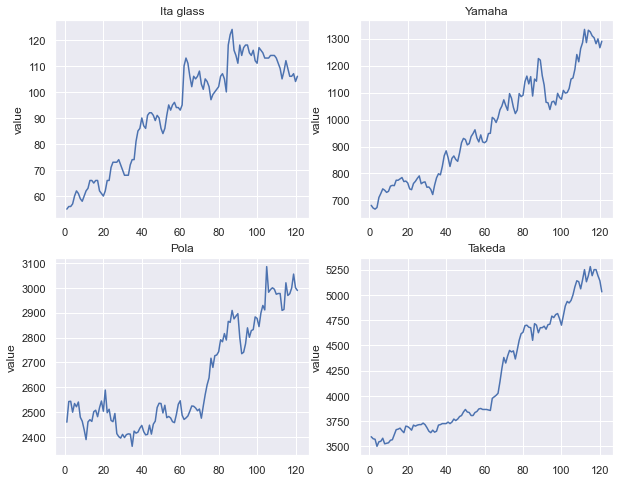

In [36]:
sns.set()

kabu_list = list(df_price4.columns)
name_list = ["Ita glass", "Yamaha", "Pola", "Takeda"]
fig = plt.figure(figsize=(10,8))

for i in range(4):
    ax1 = plt.subplot(2, 2, i+1)
    ax1.set_title(name_list[i])
    ax1.set_ylabel('value')
    ax1.plot(df_price4[kabu_list[i]])

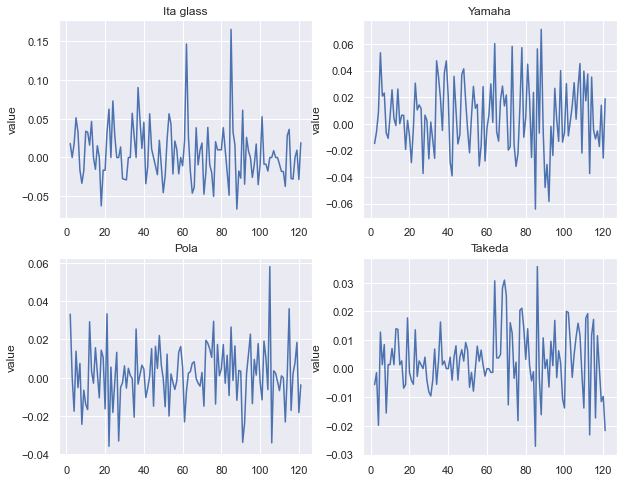

In [47]:
import math

kabu_list = list(df_price4.columns)
name_list = ["Ita glass", "Yamaha", "Pola", "Takeda"]


fig = plt.figure(figsize=(10,8))

for i in range(4):
    ax1 = plt.subplot(2, 2, i+1)
    ax1.set_title(name_list[i])
    ax1.set_ylabel('value')
    ax1.plot(df_price4[kabu_list[i]].apply(math.log).diff())

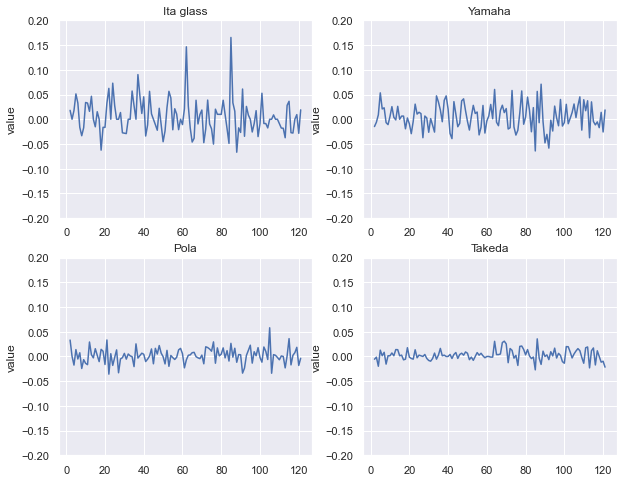

In [46]:
import math

kabu_list = list(df_price4.columns)
name_list = ["Ita glass", "Yamaha", "Pola", "Takeda"]


fig = plt.figure(figsize=(10,8))

for i in range(4):
    ax1 = plt.subplot(2, 2, i+1)
    ax1.set_title(name_list[i])
    ax1.set_ylabel('value')
    ax1.set_ylim([-0.20, 0.20])
    ax1.plot(df_price4[kabu_list[i]].apply(math.log).diff())

In [60]:
# 収益率の計算
df_return = pd.read_csv('./data/return4.csv', sep=" ")

df_return = df_return.rename(columns=dict(zip(kabu_list, name_list)))

# 収益率の平均
df_return.mean()

Ita glass    0.546755
Yamaha       0.531140
Pola         0.162315
Takeda       0.279897
dtype: float64

In [61]:
# 収益率のボラティリティ
df_return.std()

Ita glass    3.565816
Yamaha       2.638556
Pola         1.546933
Takeda       1.133956
dtype: float64

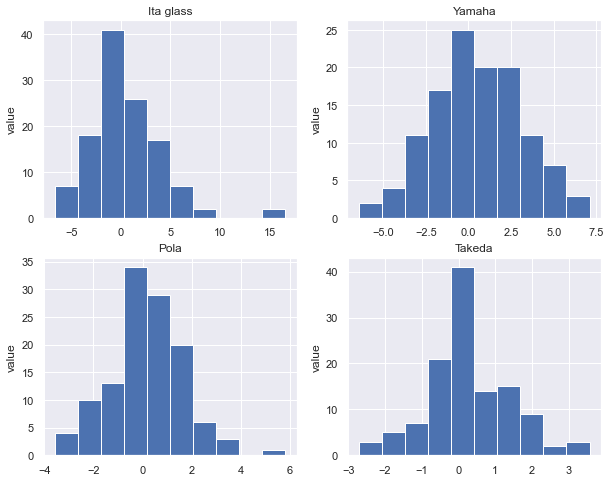

In [64]:
import math

kabu_list = list(df_price4.columns)
name_list = ["Ita glass", "Yamaha", "Pola", "Takeda"]


fig = plt.figure(figsize=(10,8))

for i in range(4):
    ax1 = plt.subplot(2, 2, i+1)
    ax1.set_title(name_list[i])
    ax1.set_ylabel('value')
    ax1.hist(df_return[name_list[i]])

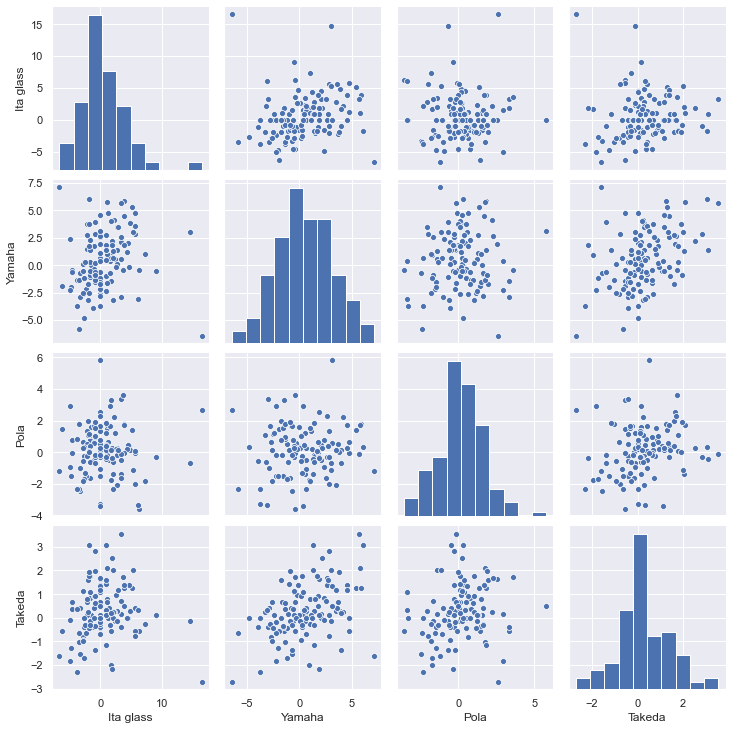

In [67]:
sns.pairplot(df_return)

In [87]:
from scipy import stats

# 正規性検定
data = []
for item in name_list:
    shapiro_test = stats.shapiro(df_return[item])
    data.append((item, shapiro_test[0], shapiro_test[1]))


In [91]:
df_shapiro_wilk = pd.DataFrame(data, columns=['Comapny', 't-value', 'pvalue'])
df_shapiro_wilk

,Comapny,t-value,pvalue
0,Ita glass,0.924083,0.000004
1,Yamaha,0.994977,0.948335
2,Pola,0.983232,0.141878
3,Takeda,0.984604,0.189255


In [100]:
df_X_price = pd.read_csv("./data/X_price.csv", sep=' ')
df_X_return = pd.read_csv("./data/X_return.csv", sep=' ')
df_Y_price = pd.read_csv("./data/Y_price.csv", sep=' ')
df_Y_return = pd.read_csv("./data/Y_return.csv", sep=' ')

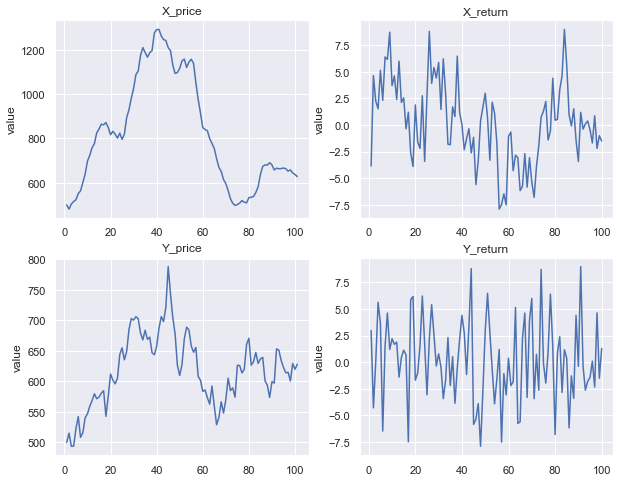

In [103]:

fig = plt.figure(figsize=(10,8))

list_dataframe = [df_X_price, df_X_return, df_Y_price, df_Y_return]
list_name = ['X_price', 'X_return', 'Y_price', 'Y_return']

for i in range(4):
    ax1 = plt.subplot(2, 2, i+1)
    ax1.set_title(list_name[i])
    ax1.set_ylabel('value')
    ax1.plot(list_dataframe[i])

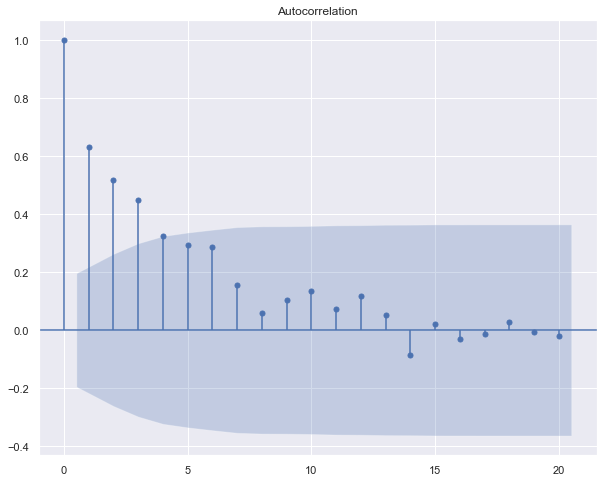

In [116]:
import matplotlib as mpl
import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

a = np.arange(1,11)
b = np.tile(a, 3)

with mpl.rc_context():
    mpl.rc("figure", figsize=(10, 8))
    plot_acf(df_X_return, lags=20);

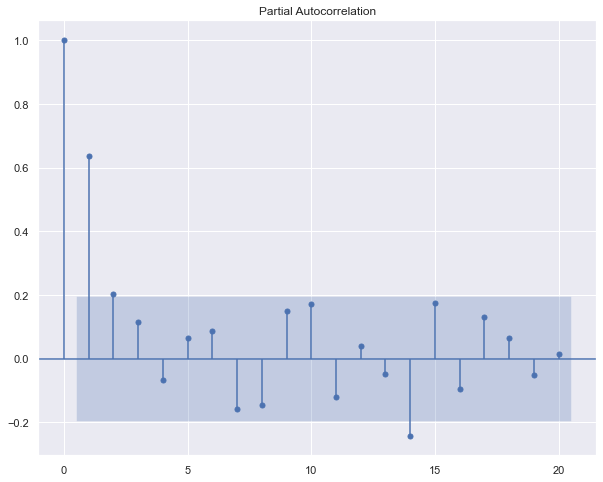

In [117]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(10, 8))
    plot_pacf(df_X_return, lags=20);

In [121]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(df_X_return, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,125.689217,3.530785e-22


In [122]:
acorr_ljungbox(df_Y_return, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,17.67618,0.060678


In [125]:
# AR model
import statsmodels.api as sm

model = sm.tsa.AR(df_X_return)
# AICでモデルの次数を選択
print(model.select_order(maxlag=1, ic='aic'))  # 出力:2

# 推定
result = model.fit(maxlag=1)

# モデルが推定したパラメーター
print(result.params)
print(result.sigma2)

1
const    0.113989
L1.x     0.632272
dtype: float64
8.440205055476454
/Users/beeyan/Drive/Analytics/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [127]:
# AR(1) modelの作成
model = sm.tsa.AR(df_Y_return)
print(model.select_order(maxlag=1, ic='aic'))  # 出力:1

# AR(1) modelの推定
result = model.fit(maxlag=1)

print(result.params)
print(result.sigma2)

1
const    0.195068
L1.x     0.023429
dtype: float64
14.23814576807326
/Users/beeyan/Drive/Analytics/.venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [128]:
from statsmodels.tsa.stattools import adfuller

In [129]:
adfuller(df_price4['x7272'])

(-0.6050944570008022,
 0.869826728098464,
 0,
 120,
 {'1%': -3.486055829282407,
  '5%': -2.8859430324074076,
  '10%': -2.5797850694444446},
 1022.6328404482572)

In [132]:
adfuller(df_return['Yamaha'])

(-11.334012882683957,
 1.0949785696011188e-20,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 516.0584249284203)